# Import the modules

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot , quarter_plot   
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error , mean_squared_error , mean_absolute_percentage_error

## Load the data

In [31]:
df = pd.read_csv('airmiles.csv' , index_col = 0 , parse_dates = True , dayfirst = True)
df.head(15)

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
1996-06-01,38772238
1996-07-01,40395657
1996-08-01,41738499
1996-09-01,33580773


## Infromation about the data frame

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [33]:
# Index
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq=None)

In [34]:
# Df index frequency is none its neeed to change
# This index is set it to the start of the month
df = df.asfreq("MS")
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [35]:
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


## Exploritory Data Analysis

In [39]:
# Raname Y variable
df = df.rename(columns = {'airmiles':'Y'})
df.head()

,Y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


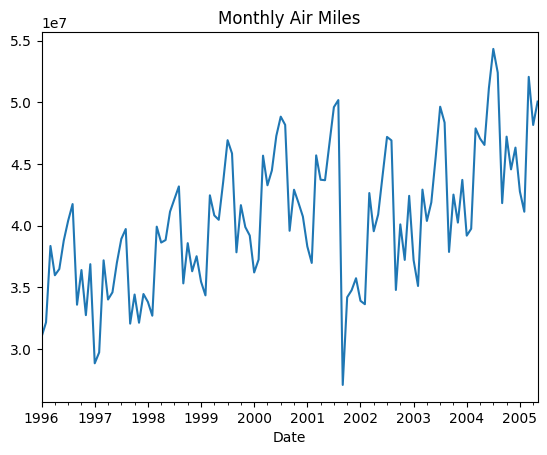

In [40]:
# Monthly airmiles data viz
df['Y'].plot(title = 'Monthly Air Miles')
plt.show()

## Plotting the monthly seasonality

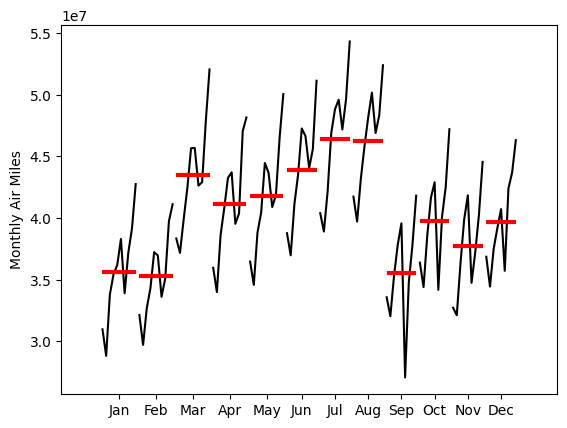

In [42]:
month_plot(df['Y'], ylabel = 'Monthly Air Miles')
plt.show()

## Plotting the quarterly seasonality

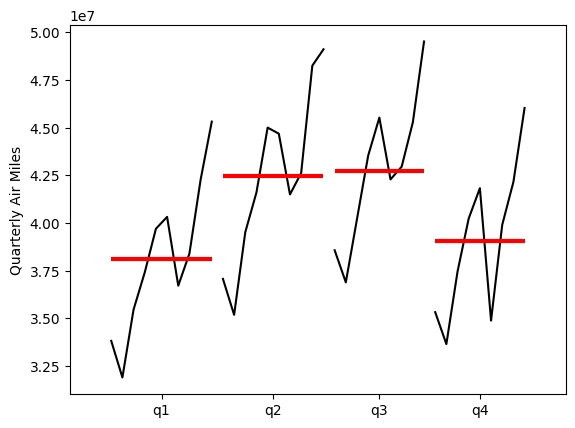

In [46]:
quarter_plot(df['Y'].resample('QE').mean(), ylabel = 'Quarterly Air Miles')
plt.show()

## Seasonal Decomposition Plots

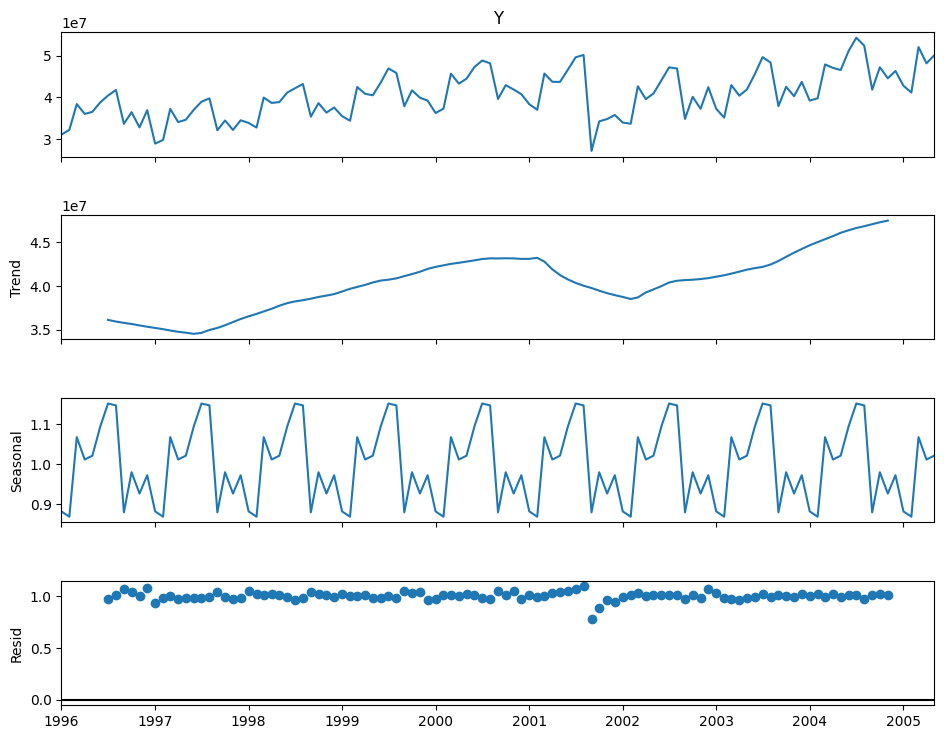

In [47]:
decomposition = seasonal_decompose(df['Y'], model = 'mul' , period = 12 )
fig= decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

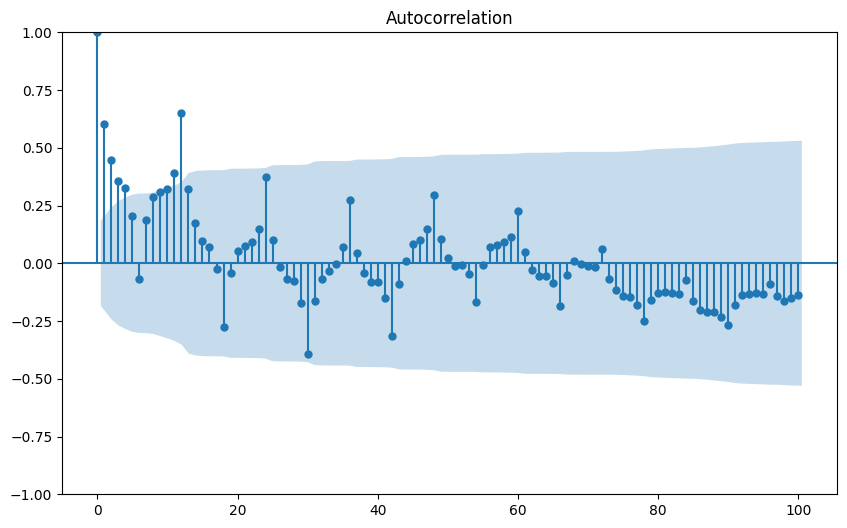

In [49]:
# Plot the Auto Correlation (ACF)
fig , ax = plt.subplots(figsize = (10,6))
plot_acf(df['Y'], lags = 100, ax = ax)
plt.show()

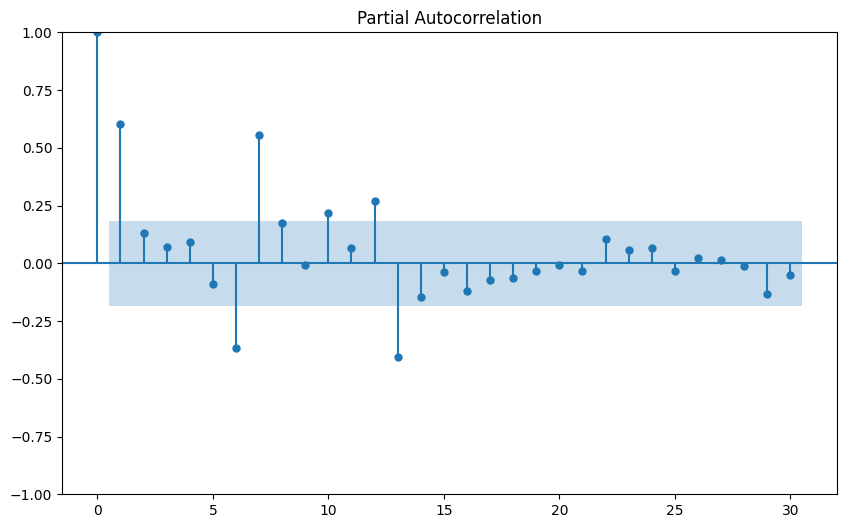

In [51]:
# Plot the partial autocorrelation (PACF)
fig , ax = plt.subplots(figsize = (10,6))
plot_pacf(df['Y'], lags = 30, ax = ax)
plt.show()

## Training & Test

In [53]:
# Training & test split
periods = 12
train , test =  df.iloc[:-periods,:], df.iloc[-periods:,:]

In [54]:
train.head()

,Y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [55]:
test.head()

,Y
Date,
2004-06-01,51134050
2004-07-01,54317314
2004-08-01,52392985
2004-09-01,41816777
2004-10-01,47205665


## Triple Exponential Smoothing

In [69]:
#Triple Exponential Smoothing
model = ExponentialSmoothing(train , trend = 'mul' , seasonal = 'mul', seasonal_periods = 12 ).fit()
model

C:\Users\Niroshan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [70]:
# Predictions
predictions = model.forecast(len(test)).rename("Holt-Winters")
predictions

2004-06-01    4.989814e+07
2004-07-01    5.232020e+07
2004-08-01    5.246731e+07
2004-09-01    4.147231e+07
2004-10-01    4.632250e+07
2004-11-01    4.366543e+07
2004-12-01    4.583298e+07
2005-01-01    4.142760e+07
2005-02-01    4.104454e+07
2005-03-01    5.053423e+07
2005-04-01    4.798055e+07
2005-05-01    4.852405e+07
Freq: MS, Name: Holt-Winters, dtype: float64

## Function to assess model & visualization

In [71]:
def model_assestment (train , test , predictions, chart_title):
    # Plot training , test and forecast
    plt.figure(figsize = (10,4))
    plt.plot(train, label = 'Train')
    plt.plot(test , label = 'Test')
    plt.plot(predictions, label = 'Forecast')
    plt.title(f"Train , Test & Prediction with {chart_title}")
    plt.legend()
    plt.show()

    # Calculating MAE, RMSE and MAPE
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mape = mean_absolute_percentage_error(test, predictions)
    
    print(f"The MAE is {mae:.2f}")
    print(f"The RSME is {rmse:.2f}")
    print(f"The MAPE is {100 * mape:.2f}%")



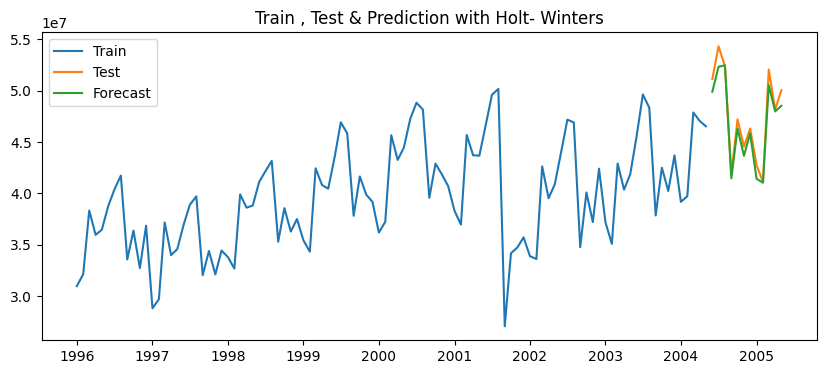

The MAE is 877575.16
The RSME is 1075653.07
The MAPE is 1.80%


In [73]:
model_assestment (train , test , predictions, "Holt- Winters")

## Predicting the future

In [74]:
model = ExponentialSmoothing(df['Y'] , trend = 'mul' , seasonal = 'mul', seasonal_periods = 12 ).fit()
model

# Predictions
predictions = model.forecast(steps =  12).rename("Holt-Winters")
predictions

C:\Users\Niroshan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2005-06-01    5.317705e+07
2005-07-01    5.585684e+07
2005-08-01    5.559980e+07
2005-09-01    4.374628e+07
2005-10-01    4.922822e+07
2005-11-01    4.655935e+07
2005-12-01    4.885796e+07
2006-01-01    4.429477e+07
2006-02-01    4.367190e+07
2006-03-01    5.397746e+07
2006-04-01    5.112520e+07
2006-05-01    5.178827e+07
Freq: MS, Name: Holt-Winters, dtype: float64

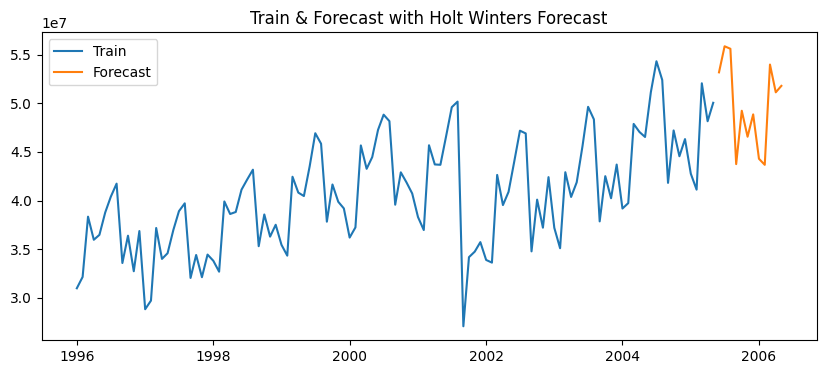

In [77]:
def plot_future (y , forecast , title):
    plt.figure(figsize = (10,4))
    plt.plot(y, label = 'Train')
    plt.plot(forecast, label = 'Forecast')
    plt.title(f'Train & Forecast with {title}')
    plt.legend()
    plt.show()

plot_future (df.Y , predictions , "Holt Winters Forecast")
